In [45]:
import os
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from deepface import DeepFace

In [31]:
#list of test
os.listdir('ktp')

['1.jpeg', '2.jpeg', '3.jpeg']

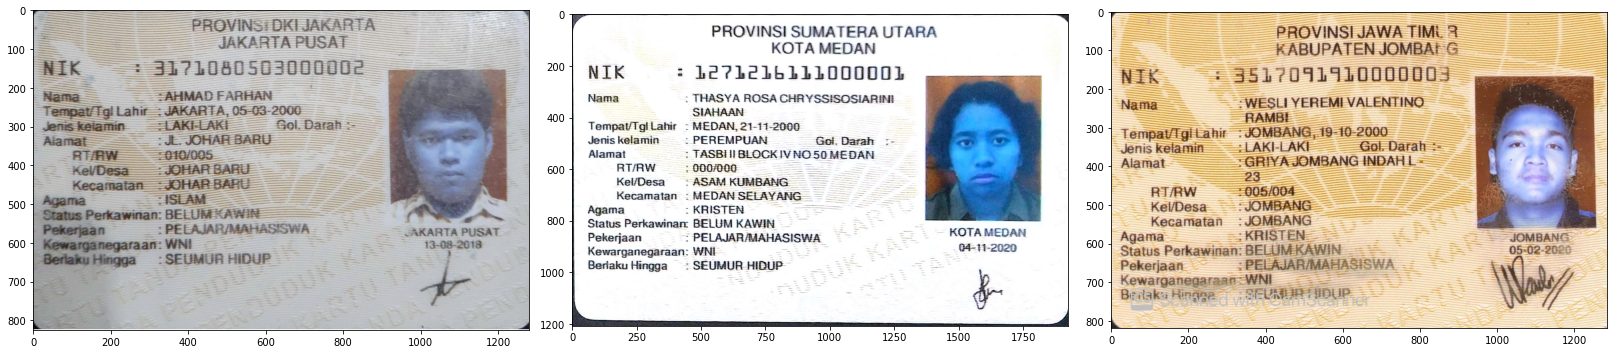

In [32]:
#here are some id card test sample from ML coho
ktp_1 = cv2.imread('ktp\\1.jpeg')
ktp_2 = cv2.imread('ktp\\2.jpeg')
ktp_3 = cv2.imread('ktp\\3.jpeg')

plt.rcParams["figure.figsize"] = [30, 45]
plt.rcParams["figure.autolayout"] = True
plt.subplot(1, 4, 1)
plt.imshow(ktp_1, cmap="Blues_r")
plt.subplot(1, 4, 2)
plt.imshow(ktp_2, cmap="Accent_r")
plt.subplot(1, 4, 3)
plt.imshow(ktp_3, cmap="terrain_r")


In [33]:
#face sample
os.listdir('muka')

['1.jpg', '2.png', '3.jpeg']

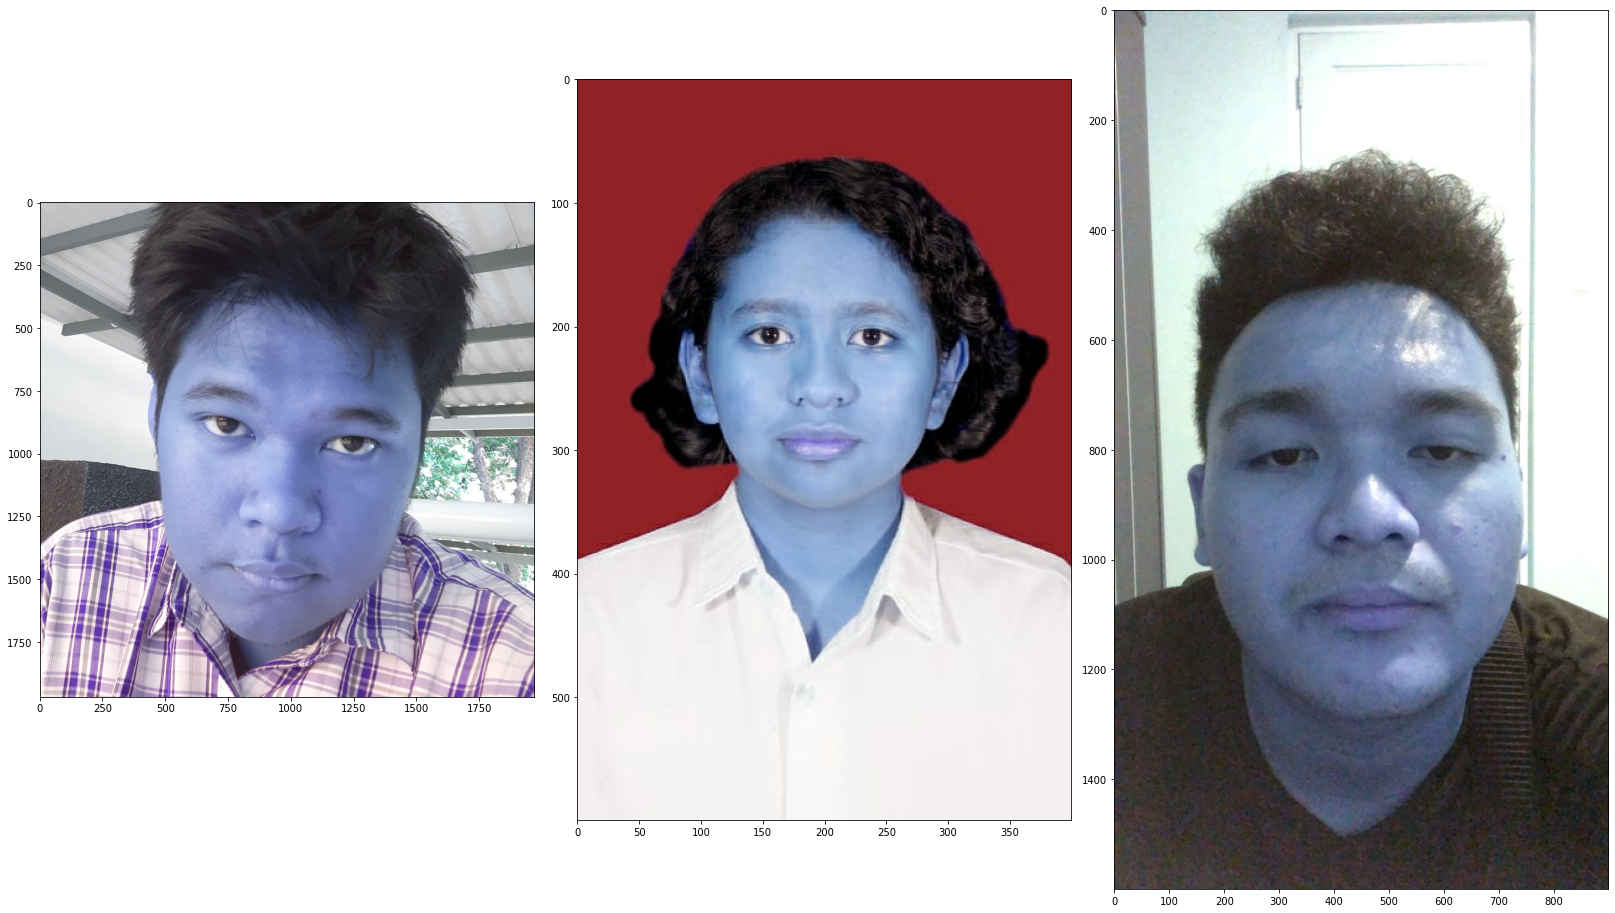

In [34]:
#and here are the face sample
muka_1 = cv2.imread('muka\\1.jpg')
muka_2 = cv2.imread('muka\\2.png')
muka_3 = cv2.imread('muka\\3.jpeg')

plt.rcParams["figure.figsize"] = [30, 45]
plt.rcParams["figure.autolayout"] = True
plt.subplot(1, 4, 1)
plt.imshow(muka_1, cmap="Blues_r")
plt.subplot(1, 4, 2)
plt.imshow(muka_2, cmap="Accent_r")
plt.subplot(1, 4, 3)
plt.imshow(muka_3, cmap="terrain_r")


In [35]:
def ocr(img):
    '''
    this function takes in images of a KTP and return a string of information that is read on the ktp by the model
    '''
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
    text = pytesseract.image_to_string(threshed, lang="ind")
    return text

In [39]:
print(ocr(ktp_1))
print('---------------------------------------------')
print(ocr(ktp_2))
print('---------------------------------------------')
print(ocr(ktp_3))

NIK :

Nama :AHMAD FARHAN
Tempat/Tg! Lahir: JAKARTA, 05-63 20UG

Jenis keiamn IL AKI AKI Sol. Darah :-

Asa mat "JL. JOHAR BARU
RTRW MLS.
relDesa : SGHAR BARU
Kecamatan : JOHAR BAH

Agama ISLAM

Status Perkawinan: BELUM “Awi

Pekerjaan | PELAJA: /MA:

Kewarganegaraan: WN!

Berlaku Hingga SEUMIR HIDUP

PSA


---------------------------------------------
1 1 " ON
PROVINSI SUMATERA UTAR#
KOTA MEDAM

NIK : 1274121651110000053
Nama THASYA ROSA CHRYSSisSOSiAn!Ni
SIAHAAN
Tempar'Tgi Lahir : MEDAN, 21-11-2506
Jenis kelamin : PEREMPUAN Sci Darah
Alamat 1 TASBHI BLOCK IV NO 50 MEDAN
RT/RW : 6007069

Kel/Desa ASAM KUMBANG
Kecamatan : MEDAN SELAYANG

Agama : KRISTEN
Status Perkawinan: BELUM KAWIN
Pekerjaan : PELAJAR/MAHASISWA

Kewarganegaraan: WNI
Berdaku Hingga SEUMUR HIDUP


---------------------------------------------
PROVINSI JAWA TIM 2
£ ABUPATEN JOMBA# &

IK : 355 091910000063:
Nama : WESLI YEREMI VALENTINO
BAMB!
Tempat/Tgi Lahir : JOMBANG, 19-10-2000
Jenis kelamin : LAKI-LAKI Gol. Darah :-


In [47]:
#verifiying the face
def verify(id, face):
    '''
    this function takes in id card images, and perosn to be verified images, it will return True if the 
    face of the user match their id
    '''
    backend = 'retinaface'
    model = 'Facenet'
    dm = 'euclidean_l2'
    result = DeepFace.verify(img1_path = id, img2_path = face, model_name = model , detector_backend = backend, distance_metric = dm)
    return result['verified']

In [48]:
print(verify(ktp_1, muka_1))
print(verify(ktp_2, muka_2))
print(verify(ktp_3, muka_3))

False
True
True
